In [14]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [15]:
max_features = 20000
max_len = 100
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

In [16]:
model_layers_dict = {
    "RNN 8" : [
        Embedding(max_features, 8),
        SimpleRNN(8, input_shape=(max_features,max_len)),
        Dense(1, activation='sigmoid'),
    ],
    "RNN 32" : [
        Embedding(max_features, 8),
        SimpleRNN(32, input_shape=(max_features,max_len)),
        Dense(1, activation='sigmoid'),
    ],
    "LSTM 8" : [
        Embedding(max_features, 8),
        LSTM(8),
        Dense(1, activation='sigmoid'),
    ],
    "LSTM 32" : [
        Embedding(max_features, 8),
        LSTM(32),
        Dense(1, activation='sigmoid'),
    ]
}
models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

RNN 8
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 8)           160000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________
RNN 32
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 8)           160000    
                                                                 
 simple_rnn

In [17]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 27s 33ms/step - loss: 0.5435 - accuracy: 0.7196 - val_loss: 0.4385 - val_accuracy: 0.8090
Epoch 2/5
782/782 [==============================] - 27s 35ms/step - loss: 0.3188 - accuracy: 0.8701 - val_loss: 0.3728 - val_accuracy: 0.8352
Epoch 3/5
782/782 [==============================] - 26s 33ms/step - loss: 0.2191 - accuracy: 0.9197 - val_loss: 0.4338 - val_accuracy: 0.8269
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 0.1527 - accuracy: 0.9492 - val_loss: 0.4304 - val_accuracy: 0.8315
Epoch 5/5
782/782 [==============================] - 21s 26ms/step - loss: 0.1106 - accuracy: 0.9635 - val_loss: 0.5113 - val_accuracy: 0.8250


 25%|██▌       | 1/4 [01:59<05:57, 119.21s/it]

Epoch 1/5
782/782 [==============================] - 21s 25ms/step - loss: 0.6857 - accuracy: 0.5408 - val_loss: 0.6823 - val_accuracy: 0.5593
Epoch 2/5
782/782 [==============================] - 19s 24ms/step - loss: 0.5547 - accuracy: 0.7088 - val_loss: 0.4463 - val_accuracy: 0.8063
Epoch 3/5
782/782 [==============================] - 19s 25ms/step - loss: 0.3176 - accuracy: 0.8672 - val_loss: 0.4200 - val_accuracy: 0.8296
Epoch 4/5
782/782 [==============================] - 20s 26ms/step - loss: 0.2081 - accuracy: 0.9229 - val_loss: 0.4188 - val_accuracy: 0.8262
Epoch 5/5
782/782 [==============================] - 20s 25ms/step - loss: 0.1486 - accuracy: 0.9473 - val_loss: 0.4863 - val_accuracy: 0.8230


 50%|█████     | 2/4 [03:38<03:35, 107.57s/it]

Epoch 1/5
782/782 [==============================] - 32s 39ms/step - loss: 0.4492 - accuracy: 0.7819 - val_loss: 0.3534 - val_accuracy: 0.8442
Epoch 2/5
782/782 [==============================] - 28s 35ms/step - loss: 0.2533 - accuracy: 0.9024 - val_loss: 0.3905 - val_accuracy: 0.8428
Epoch 3/5
782/782 [==============================] - 28s 35ms/step - loss: 0.1770 - accuracy: 0.9373 - val_loss: 0.3989 - val_accuracy: 0.8391
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.1313 - accuracy: 0.9568 - val_loss: 0.4296 - val_accuracy: 0.8356
Epoch 5/5
782/782 [==============================] - 26s 34ms/step - loss: 0.1008 - accuracy: 0.9684 - val_loss: 0.5510 - val_accuracy: 0.8258


 75%|███████▌  | 3/4 [05:57<02:01, 121.69s/it]

Epoch 1/5
782/782 [==============================] - 31s 37ms/step - loss: 0.4349 - accuracy: 0.7884 - val_loss: 0.3545 - val_accuracy: 0.8480
Epoch 2/5
782/782 [==============================] - 29s 38ms/step - loss: 0.2464 - accuracy: 0.9030 - val_loss: 0.3541 - val_accuracy: 0.8440
Epoch 3/5
782/782 [==============================] - 32s 41ms/step - loss: 0.1824 - accuracy: 0.9334 - val_loss: 0.3974 - val_accuracy: 0.8388
Epoch 4/5
782/782 [==============================] - 33s 43ms/step - loss: 0.1360 - accuracy: 0.9531 - val_loss: 0.4485 - val_accuracy: 0.8296
Epoch 5/5
782/782 [==============================] - 39s 50ms/step - loss: 0.1078 - accuracy: 0.9648 - val_loss: 0.5827 - val_accuracy: 0.8234


100%|██████████| 4/4 [08:41<00:00, 130.38s/it]


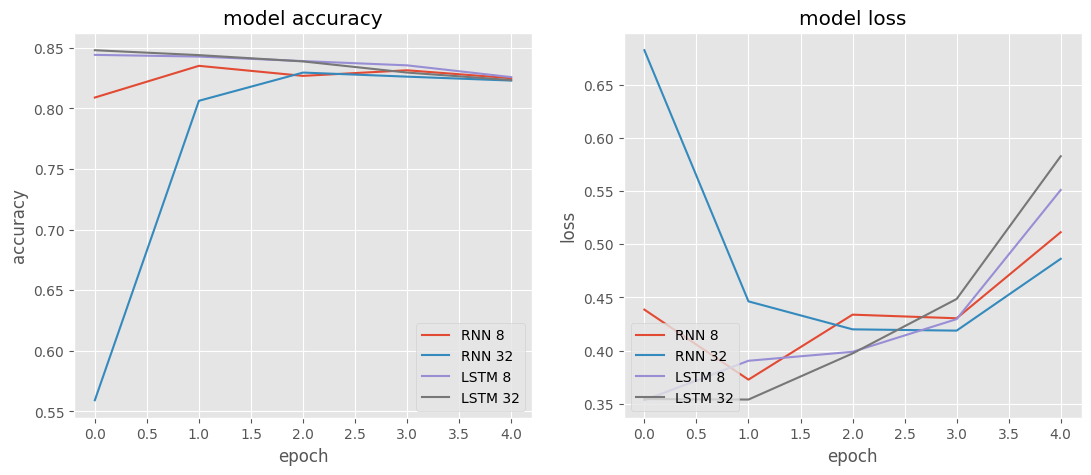

In [18]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join(models.keys()) + '.png');